In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=a8893d3adbbfaad0ab072d294f8f5230f04f62bed5ab182b8cdda6436c928f7e
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# PROJECT

## IMPORTANT FUNCTIONS

In [118]:
def calculate_sharpe_ratio(daily_returns, risk_free_rate=0):
    """
    Calculate the Sharpe ratio from a series of daily returns.

    Parameters:
    - daily_returns (pd.Series or np.array): Series of daily returns.
    - risk_free_rate (float): Annualized risk-free rate (default is 0).

    Returns:
    - float: Sharpe ratio.
    """
    # Convert the risk-free rate to a daily rate assuming 252 trading days per year
    daily_risk_free_rate = (1 + risk_free_rate) ** (1 / 252) - 1

    # Excess daily returns
    excess_daily_returns = daily_returns - daily_risk_free_rate

    # Calculate Sharpe ratio
    mean_excess_return = np.mean(excess_daily_returns)
    std_dev = np.std(excess_daily_returns, ddof=1)
    sharpe_ratio = np.sqrt(252)*mean_excess_return / std_dev if std_dev != 0 else np.nan

    return sharpe_ratio

def calculate_max_drawdown(daily_returns):
    """
    Calculate the maximum drawdown from a series of daily returns.

    Parameters:
    - daily_returns (pd.Series or np.array): Series of daily returns.

    Returns:
    - float: Maximum drawdown as a fraction (e.g., -0.20 for a 20% drawdown).
    """
    # Calculate cumulative returns
    cumulative_returns = (1 + daily_returns).cumprod()

    # Calculate rolling maximum
    rolling_max = np.maximum.accumulate(cumulative_returns)

    # Calculate drawdowns
    drawdowns = cumulative_returns / rolling_max - 1

    # Maximum drawdown
    max_drawdown = drawdowns.min()

    return max_drawdown

def calculate_sortino_ratio(returns, risk_free_rate=0.0, target_return=0):
    """
    Calculates the Sortino ratio of a series of returns.

    Args:
      returns: A pandas Series of daily returns.
      risk_free_rate: The risk-free rate of return (default is 0.0).
      target_return: The target return (default is 0.0).

    Returns:
      The Sortino ratio.
    """
    excess_returns = returns - risk_free_rate
    downside_returns = excess_returns[excess_returns < target_return]
    if len(downside_returns) == 0:
        return np.nan  # Handle cases with no downside deviations

    downside_std = downside_returns.std()
    if downside_std == 0:
        return np.inf if (excess_returns.mean() > target_return) else -np.inf

    sortino = np.sqrt(252) * excess_returns.mean() / downside_std
    return sortino

def calculate_volatility(daily_returns):
    """
    Calculate the annualized volatility of a series of daily returns.

    Parameters:
    - daily_returns (pd.Series or np.array): Series of daily returns.

    Returns:
    - float: Annualized volatility.
    """
    # Calculate the standard deviation of returns
    std_dev = np.std(daily_returns, ddof=1)

    # Calculate the annualized volatility
    annualized_volatility = std_dev * np.sqrt(252)

    return annualized_volatility

def calculate_correlation(x, y):
    correlation = np.corrcoef(x, y)[0, 1]
    return correlation

def calculate_annualized_return(daily_returns, days_per_year=252):
    """
    Calculate the annualized return from a series of daily returns.

    Parameters:
    - daily_returns (pd.Series or np.array): Series of daily returns.
    """
    return np.prod(1 + daily_returns) ** (days_per_year / len(daily_returns)) - 1

def calculate_skew(daily_returns):
    """
    Calculate the skewness of a series of daily returns.

    Parameters:
    - daily_returns (pd.Series or np.array): Series of daily returns.

    Returns:
    - float: Skewness.
    """
    return daily_returns.skew()

def plot_rolling_sharpe_ratio(daily_returns, window=500):
    """
    Plots the rolling Sharpe ratio of daily returns using a specified window.

    Parameters:
    - daily_returns: A pandas Series of daily returns.
    - window: The rolling window size for the Sharpe ratio calculation (default is 500 days).
    """
    # Ensure the input is a pandas Series
    if not isinstance(daily_returns, pd.Series):
        raise ValueError("daily_returns must be a pandas Series.")

    # Calculate the rolling mean and standard deviation
    rolling_mean = daily_returns.rolling(window=window).mean()
    rolling_std = daily_returns.rolling(window=window).std()

    # Calculate the rolling Sharpe ratio (assuming risk-free rate is 0)
    rolling_sharpe = rolling_mean *np.sqrt(252)/ rolling_std

    # Create the plot using Plotly
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=rolling_sharpe.index,
        y=rolling_sharpe,
        mode='lines',
        name='Rolling Sharpe Ratio'
    ))

    # Add plot titles and labels
    fig.update_layout(
        title=f"Rolling Sharpe Ratio (Window={window} Days)",
        xaxis_title="Date",
        yaxis_title="Sharpe Ratio",
        template="plotly_white"
    )

    fig.show()

    return fig

def calculate_print_metrics(daily_returns, spy_returns = None):
    """
    Calculate and print various metrics for a given series of daily returns.

    Parameters:
    - daily_returns (pd.Series or np.array): Series of daily returns.
    """
    # Calculate Annual Return
    annual_return = calculate_annualized_return(daily_returns)
    print(f"Annual Return: {annual_return}")
    # Calculate Volatility
    volatility = calculate_volatility(daily_returns)
    print(f"Volatility: {volatility}")
    # Calculate Sharpe ratio
    sharpe_ratio = calculate_sharpe_ratio(daily_returns)
    print(f"Sharpe Ratio: {sharpe_ratio}")
    # Calculate Sortino ratio
    sortino_ratio = calculate_sortino_ratio(daily_returns)
    print(f"Sortino Ratio: {sortino_ratio}")
    # Calculate Max Drawdown
    max_drawdown = calculate_max_drawdown(daily_returns)
    print(f"Max Drawdown: {max_drawdown}")
    # Calculate Skew
    skew = calculate_skew(daily_returns)
    print(f"Skew: {skew}")

    # Calculate the correlation between cumulative strategy returns and SPY
    correlation = calculate_correlation((1 + daily_returns).cumprod(), (1 + spy_returns).cumprod())
    print(f"Correlation between cumulative strategy returns and SPY: {correlation}")

    return annual_return, volatility, sharpe_ratio, sortino_ratio, max_drawdown

## STRATEGY

### Notes

1. S&P 500 Stocks Above 100-Day Average ($S5OH)
2. Trade movement in Term Structure
3.

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
%cd "/content/drive/MyDrive/Systematic Investment Strategies/Project/"

/content/drive/MyDrive/Systematic Investment Strategies/Project


In [71]:

df_og = pd.read_excel('project.volatility.data.xlsx')

In [72]:
df_og

Date         SPY    VIX       VVIX        f30        f60  \
0    2007-01-03  101.536598  12.04  87.629997  12.762857  13.598571   
1    2007-01-04  101.752060  11.51  88.190002  12.747500  13.431429   
2    2007-01-05  100.940468  12.14  90.169998  13.087143  13.680000   
3    2007-01-08  101.407356  12.00  92.040001  13.060000  13.724286   
4    2007-01-09  101.321091  11.91  92.760002  13.023571  13.669429   
...         ...         ...    ...        ...        ...        ...   
4379 2024-05-24  529.440002  11.93  79.089996  13.580217  14.415329   
4380 2024-05-28  529.809998  12.92  81.639999  13.985638  14.738357   
4381 2024-05-29  526.099976  14.28  83.790001  14.550607  15.108446   
4382 2024-05-30  522.609985  14.47  83.440002  14.524255  15.071069   
4383 2024-05-31  527.369995  12.92  78.269997  14.117200  14.774591   

            f90       f120       f150       f180  ...       F5        F5x  \
0     14.278214  14.915714  15.361714        NaN  ...  15.2500 2007-05-16   
1     14.010000  14.794286  15.289714        NaN  ...  15.1200 2007-05-16   
2     14.130000  14.881786  15.362857        NaN  ...  15.2000 2007-05-16   
3     14.193571  14.797143  15.281714        NaN  ...  14.9800 2007-05-16   
4     14.205714  14.750000  15.188857        NaN  ...  14.8800 2007-05-16   
...         ...        ...        ...        ...  ...      ...        ...   
4379  14.919557  15.654600  17.619357  16.762900  ...  17.7621 2024-10-16   
4380  15.260196  16.214975  17.668014  16.974457  ...  17.9105 2024-10-16   
4381  15.545121  16.524871  17.821643  17.131089  ...  18.1023 2024-10-16   
4382  15.494900  16.523214  17.720000  17.002679  ...  18.0500 2024-10-16   
4383  15.244071  16.398643  17.494680  16.865250  ...  17.8362 2024-10-16   

           F6        F6x       F7        F7x      F8        F8x  F9        F9x  
0     15.4800 2007-06-20      NaN 2007-07-18  15.920 2007-08-22 NaN 2007-09-19  
1     15.4500 2007-06-20      NaN 2007-07-18  15.900 2007-08-22 NaN 2007-09-19  
2     15.5000 2007-06-20      NaN 2007-07-18  15.940 2007-08-22 NaN 2007-09-19  
3     15.4600 2007-06-20      NaN 2007-07-18  15.880 2007-08-22 NaN 2007-09-19  
4     15.3500 2007-06-20      NaN 2007-07-18  15.890 2007-08-22 NaN 2007-09-19  
...       ...        ...      ...        ...     ...        ...  ..        ...  
4379  16.7629 2024-11-20  16.9025 2024-12-18  17.550 2025-01-22 NaN        NaT  
4380  16.9675 2024-11-20  17.0162 2024-12-18  17.625 2025-01-22 NaN        NaT  
4381  17.1200 2024-11-20  17.1821 2024-12-18  17.775 2025-01-22 NaN        NaT  
4382  17.0000 2024-11-20  17.0125 2024-12-18  17.675 2025-01-22 NaN        NaT  
4383  16.8401 2024-11-20  16.9407 2024-12-18  17.525 2025-01-22 NaN        NaT  

[4384 rows x 38 columns]

In [73]:
# Filter Training Data
df_og['Date'] = pd.to_datetime(df_og['Date'])
# df_og = df_og[df_og['Date'] >= '2018-01-01']

In [74]:
df_og.columns

Index(['Date', 'SPY', 'VIX', 'VVIX', 'f30', 'f60', 'f90', 'f120', 'f150',
       'f180', 'f210', 'f240', 'f30w_ret', 'f60w_ret', 'f90w_ret', 'f120w_ret',
       'f150w_ret', 'f180w_ret', 'f210w_ret', 'f240w_ret', 'F1', 'F1x', 'F2',
       'F2x', 'F3', 'F3x', 'F4', 'F4x', 'F5', 'F5x', 'F6', 'F6x', 'F7', 'F7x',
       'F8', 'F8x', 'F9', 'F9x'],
      dtype='object')

In [75]:
df = df_og.copy()

In [76]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plot_column = 'SPY'

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataframe by date
df = df.sort_values('Date').reset_index(drop=True)

# Get a sorted list of unique dates
dates = df['Date'].unique()

# X-axis labels for the term structure (F1 to F8)
x_terms = ['VIX','F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8']

# Create a figure with two subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=False,
                    subplot_titles=(plot_column + ' Price', 'VIX Futures Term Structure'))

# Add the SPY line plot
fig.add_trace(go.Scatter(x=df['Date'], y=df[plot_column], mode='lines', name=plot_column),
              row=1, col=1)

# Initial date
initial_date = dates[0]

# Initial SPY price
initial_spy_price = df.loc[df['Date'] == initial_date, plot_column].iloc[0]

# Add the green dot at the initial date
fig.add_trace(go.Scatter(x=[initial_date], y=[initial_spy_price], mode='markers',
                         marker=dict(color='green', size=10), name='Selected Date'),
              row=1, col=1)

# Initial VIX futures values
initial_futures = df.loc[df['Date'] == initial_date, x_terms].iloc[0]

# Add the initial term structure plot
fig.add_trace(go.Scatter(x=x_terms, y=initial_futures.values, mode='lines+markers',
                         name='Term Structure'), row=2, col=1)

# Set initial y-axis range for the term structure plot
y_min = initial_futures.min() - 1  # Adjust as needed
y_max = initial_futures.max() + 1  # Adjust as needed
fig.update_yaxes(range=[y_min, y_max], row=2, col=1)

# Create frames for animation
frames = []
for date in dates:
    # Get SPY price and VIX futures values for the current date
    spy_price = df.loc[df['Date'] == date, plot_column].iloc[0]
    futures_values = df.loc[df['Date'] == date, x_terms].iloc[0]

    # Calculate y-axis range for the term structure plot
    y_min = futures_values.min() - 1  # Adjust as needed
    y_max = futures_values.max() + 1  # Adjust as needed

    # Create a frame for the current date
    frame = go.Frame(
        data=[
            # Update the green dot position
            go.Scatter(x=[date], y=[spy_price]),
            # Update the term structure plot
            go.Scatter(x=x_terms, y=futures_values.values)
        ],
        layout=go.Layout(
            yaxis2=dict(range=[y_min, y_max])  # Update y-axis of the term structure plot
        ),
        traces=[1, 2],  # Indices of the traces to update
        name=str(date)
    )
    frames.append(frame)

# Add frames to the figure
fig.frames = frames

# Add a slider for interactivity
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Date: "},
    pad={"t": 50},
    steps=[
        dict(method='animate', args=[[str(date)],
             {"frame": {"duration": 0, "redraw": True},
              "mode": "immediate",
              "transition": {"duration": 0}}],
             label=str(date.date())) for date in dates
    ])]

# Update the layout with sliders and play button
fig.update_layout(
    sliders=sliders,
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        y=1,
        x=1.05,
        xanchor='left',
        yanchor='top',
        pad=dict(t=0, r=10),
        buttons=[dict(label='Play',
                      method='animate',
                      args=[None,
                            {"frame": {"duration": 500, "redraw": True},
                             "fromcurrent": True,
                             "transition": {"duration": 300}}])]
    )],
    height=600,
    width=800,
    title_text= plot_column + " and VIX Futures Term Structure Over Time"
)

# Show the figure
fig.show()

In [77]:
df_og

Date         SPY    VIX       VVIX        f30        f60  \
0    2007-01-03  101.536598  12.04  87.629997  12.762857  13.598571   
1    2007-01-04  101.752060  11.51  88.190002  12.747500  13.431429   
2    2007-01-05  100.940468  12.14  90.169998  13.087143  13.680000   
3    2007-01-08  101.407356  12.00  92.040001  13.060000  13.724286   
4    2007-01-09  101.321091  11.91  92.760002  13.023571  13.669429   
...         ...         ...    ...        ...        ...        ...   
4379 2024-05-24  529.440002  11.93  79.089996  13.580217  14.415329   
4380 2024-05-28  529.809998  12.92  81.639999  13.985638  14.738357   
4381 2024-05-29  526.099976  14.28  83.790001  14.550607  15.108446   
4382 2024-05-30  522.609985  14.47  83.440002  14.524255  15.071069   
4383 2024-05-31  527.369995  12.92  78.269997  14.117200  14.774591   

            f90       f120       f150       f180  ...       F5        F5x  \
0     14.278214  14.915714  15.361714        NaN  ...  15.2500 2007-05-16   
1     14.010000  14.794286  15.289714        NaN  ...  15.1200 2007-05-16   
2     14.130000  14.881786  15.362857        NaN  ...  15.2000 2007-05-16   
3     14.193571  14.797143  15.281714        NaN  ...  14.9800 2007-05-16   
4     14.205714  14.750000  15.188857        NaN  ...  14.8800 2007-05-16   
...         ...        ...        ...        ...  ...      ...        ...   
4379  14.919557  15.654600  17.619357  16.762900  ...  17.7621 2024-10-16   
4380  15.260196  16.214975  17.668014  16.974457  ...  17.9105 2024-10-16   
4381  15.545121  16.524871  17.821643  17.131089  ...  18.1023 2024-10-16   
4382  15.494900  16.523214  17.720000  17.002679  ...  18.0500 2024-10-16   
4383  15.244071  16.398643  17.494680  16.865250  ...  17.8362 2024-10-16   

           F6        F6x       F7        F7x      F8        F8x  F9        F9x  
0     15.4800 2007-06-20      NaN 2007-07-18  15.920 2007-08-22 NaN 2007-09-19  
1     15.4500 2007-06-20      NaN 2007-07-18  15.900 2007-08-22 NaN 2007-09-19  
2     15.5000 2007-06-20      NaN 2007-07-18  15.940 2007-08-22 NaN 2007-09-19  
3     15.4600 2007-06-20      NaN 2007-07-18  15.880 2007-08-22 NaN 2007-09-19  
4     15.3500 2007-06-20      NaN 2007-07-18  15.890 2007-08-22 NaN 2007-09-19  
...       ...        ...      ...        ...     ...        ...  ..        ...  
4379  16.7629 2024-11-20  16.9025 2024-12-18  17.550 2025-01-22 NaN        NaT  
4380  16.9675 2024-11-20  17.0162 2024-12-18  17.625 2025-01-22 NaN        NaT  
4381  17.1200 2024-11-20  17.1821 2024-12-18  17.775 2025-01-22 NaN        NaT  
4382  17.0000 2024-11-20  17.0125 2024-12-18  17.675 2025-01-22 NaN        NaT  
4383  16.8401 2024-11-20  16.9407 2024-12-18  17.525 2025-01-22 NaN        NaT  

[4384 rows x 38 columns]

In [78]:
# prompt: plot f30 f60 and son till f240 along Date
df = df_og.copy()

import plotly.graph_objects as go

# Assuming 'df' is your DataFrame with 'Date', 'F30', 'F60', ..., 'F240' columns

# Create the plot
fig = go.Figure()

# Add traces for each futures contract
for col in ['f30', 'f60', 'f90', 'f120', 'f150', 'f180', 'f210', 'f240', 'VIX']:
    if col in df.columns:
        fig.add_trace(go.Scatter(x=df['Date'], y=df[col], mode='lines', name=col))

# Update layout
fig.update_layout(title='VIX Futures Term Structure',
                  xaxis_title='Date',
                  yaxis_title='Futures Price')

fig.show()

In [79]:
# Calculate daily returns
df['SPY_Return'] = df['SPY'].pct_change()

## RSI on f30 strategy

In [80]:
df['RSI_SPY'] = ta.rsi(df['SPY'], length=28)
df['RSI_f30'] = ta.rsi(df['f30'], length=28)
df['RSI_f30_lagged'] = df['RSI_f30'].shift(1)


rsi_bound = 65
df['RSI_f30_above_60_Flag'] = np.where(df['RSI_f30'] > rsi_bound, 1, 0) #RSI_f30

# prompt: create a column RSI_Flag which is 1 if RSI_f30_above_60_Flag is 1. and -1 if RSI_f30_above_60_Flag is 0 and F1 is above 20 and 0 otherwise

df['RSI_Flag'] = 0  # Initialize the RSI_Flag column
df.loc[(df['RSI_f30_above_60_Flag'] == 1), 'RSI_Flag'] = 1
df.loc[(df['RSI_f30_above_60_Flag'] == 0) & (df['F1'] > 20), 'RSI_Flag'] = -1

df['RSI_Flag_lagged'] = df['RSI_Flag'].shift(1)




fig = go.Figure()

# Define colors for different flags
colors = {0: 'yellow', 1: 'green', -1: 'red'}  # Example colors

# Iterate through unique flags
for flag in df['RSI_Flag_lagged'].unique(): # brother what is this loop hahaha [0,1]
    # Filter data based on the flag
    subset = df[df['RSI_Flag_lagged'] == flag]

    # Add a trace for the current flag
    fig.add_trace(go.Scatter(x=subset['Date'], y=subset['f30']-subset['f60'], mode='markers', name=f'SPY (Flag {flag})', line=dict(color=colors.get(flag, 'gray'))))


# Update layout
fig.update_layout(title='f30 - f60 with Different Colors Based on RSI_Flag_lagged',
                  xaxis_title='Date',
                  yaxis_title='f30 - f60')

fig.show()

In [81]:
import plotly.graph_objects as go

# Define the quadrant boundaries
x_boundary = 0
y_boundary = rsi_bound

# Calculate the frequency of markers in each quadrant
quadrant_1 = df[(df['f30w_ret'] - df['f60w_ret'] > x_boundary) & (df['RSI_f30_lagged'] > y_boundary)]
quadrant_2 = df[(df['f30w_ret'] - df['f60w_ret'] <= x_boundary) & (df['RSI_f30_lagged'] > y_boundary)]
quadrant_3 = df[(df['f30w_ret'] - df['f60w_ret'] <= x_boundary) & (df['RSI_f30_lagged'] <= y_boundary)]
quadrant_4 = df[(df['f30w_ret'] - df['f60w_ret'] > x_boundary) & (df['RSI_f30_lagged'] <= y_boundary)]

# Calculate frequencies for each quadrant based on `RSI_Flag_lagged`
freq_q1 = quadrant_1['RSI_Flag_lagged'].value_counts()
freq_q2 = quadrant_2['RSI_Flag_lagged'].value_counts()
freq_q3 = quadrant_3['RSI_Flag_lagged'].value_counts()
freq_q4 = quadrant_4['RSI_Flag_lagged'].value_counts()

# Prepare text for each quadrant
def format_freq_text(freq_series):
    return '<br>'.join([f"{flag}: {count}" for flag, count in freq_series.items()])

text_q1 = format_freq_text(freq_q1)
text_q2 = format_freq_text(freq_q2)
text_q3 = format_freq_text(freq_q3)
text_q4 = format_freq_text(freq_q4)

# Create the scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['f30w_ret'] - df['f60w_ret'],
    y=df['RSI_f30_lagged'],
    mode='markers',
    marker=dict(
        color=df['RSI_Flag_lagged'],  # Column for coloring
        colorscale='RdYlGn',               # Choose a colorscale
        showscale=True                      # Show the color scale
    )
))

# Add vertical and horizontal lines
fig.add_shape(
    type="line",
    x0=x_boundary, x1=x_boundary,
    y0=20, y1=90,  # Adjust based on the y-axis range
    line=dict(color="Red", width=2, dash="dash")
)
fig.add_shape(
    type="line",
    x0=-0.15, x1=0.25,
    y0=y_boundary, y1=y_boundary,  # Adjust based on the x-axis range
    line=dict(color="Black", width=2, dash="dash")
)

# Annotate frequencies in each quadrant
fig.add_annotation(x=0.2, y=80, text=text_q1, showarrow=False, font=dict(color="black", size=12))
fig.add_annotation(x=-0.1, y=80, text=text_q2, showarrow=False, font=dict(color="black", size=12))
fig.add_annotation(x=-0.1, y=30, text=text_q3, showarrow=False, font=dict(color="black", size=12))
fig.add_annotation(x=0.2, y=30, text=text_q4, showarrow=False, font=dict(color="black", size=12))

fig.update_layout(
    title='Difference of f30 and f60 vs. RSI with Quadrant Frequencies',
    xaxis_title='f30w_ret - f60w_ret',
    yaxis_title='RSI_f30_lagged'
)

fig.show()

In [82]:
# prompt: plot the probability distribution of the markers for f30w_ret - f60w_ret

import plotly.figure_factory as ff

# Assuming 'df' is your DataFrame with 'f30w_ret', 'f60w_ret', and 'RSI_Flag_lagged' columns

# Calculate the difference between f30w_ret and f60w_ret
df['f30w_ret_minus_f60w_ret'] = df['f30w_ret'] - df['f60w_ret']

# Remove inf and NaN values before creating the distribution plot
valid_data = df[['f30w_ret_minus_f60w_ret','RSI_Flag_lagged']][np.isfinite(df['f30w_ret_minus_f60w_ret'])]

valid_one = valid_data['f30w_ret_minus_f60w_ret'][valid_data['RSI_Flag_lagged'] == 1]
valid_minus1 = valid_data['f30w_ret_minus_f60w_ret'][valid_data['RSI_Flag_lagged'] == -1]
valid_zero = valid_data['f30w_ret_minus_f60w_ret'][valid_data['RSI_Flag_lagged'] == 0]

#----------------------------------------------------------------------------------------
# Create the distribution plot using the valid data
fig = ff.create_distplot([valid_one], group_labels=['f30w_ret - f60w_ret'], bin_size=.005,colors=['green'])

# Customize the plot (optional)
fig.update_layout(title='Probability Distribution of f30w_ret - f60w_ret',
                  xaxis_title='f30w_ret - f60w_ret',
                  yaxis_title='Probability Density')

# Show the plot
fig.show()
#----------------------------------------------------------------------------------------

fig = ff.create_distplot([valid_minus1], group_labels=['f30w_ret - f60w_ret'], bin_size=.005,colors=['red'])
# Customize the plot (optional)
fig.update_layout(title='Probability Distribution of f30w_ret - f60w_ret',
                  xaxis_title='f30w_ret - f60w_ret',
                  yaxis_title='Probability Density')
fig.show()
#----------------------------------------------------------------------------------------
fig = ff.create_distplot([valid_zero], group_labels=['f30w_ret - f60w_ret'], bin_size=.005,colors=['yellow'])
# Customize the plot (optional)
fig.update_layout(title='Probability Distribution of f30w_ret - f60w_ret',
                  xaxis_title='f30w_ret - f60w_ret',
                  yaxis_title='Probability Density')
fig.show()
#----------------------------------------------------------------------------------------


In [100]:
p1 = 'f30w_ret'
p2 = 'f60w_ret'

# Step 0: Your existing strategy setup
# Initialize positions
df['position'] = 0  # Initialize the column
df['position_F1'] = 0
df['position_F2'] = 0
df['position_F3'] = 0
df['position_F4'] = 0
df['position_F5'] = 0
df['position_F6'] = 0
df['position_F7'] = 0

# Define trading logic
df.loc[df['RSI_f30_above_60_Flag'] == 1, 'position_F1'] = 1
df.loc[df['RSI_f30_above_60_Flag'] == 1, 'position_F3'] = -1
df.loc[df['RSI_f30_above_60_Flag'] == 1, 'position'] = 0

df.loc[(df['RSI_f30_above_60_Flag'] == 0) & (df['f30'] > 20), 'position_F1'] = -1
df.loc[(df['RSI_f30_above_60_Flag'] == 0) & (df['f30'] > 20), 'position_F3'] = 1
df.loc[(df['RSI_f30_above_60_Flag'] == 0) & (df['f30'] > 20), 'position'] = 0

df.loc[df['RSI_f30_above_60_Flag'] == 0, 'position'] = 0


# Initial strategy returns calculation
df['strategy_returns'] = (df['position'].shift(1) * df['SPY_Return'] +
                          df['position_F1'].shift(1) * df[p1] +
                          df['position_F3'].shift(1) * df[p2])

# Initial cumulative strategy returns
df['cumulative_strategy_returns'] = (1 + df['strategy_returns']).cumprod()

# Step 1: Identify Large Losses
df['large_loss'] = df['strategy_returns'] <= -0.05

# Step 2: Implement the Cool-Down Logic
# Initialize sidelined flag
cooldown_period = 0
df['sidelined'] = 0
sidelined_counter = 0

for idx in range(len(df)):
    i = df.index[idx]
    if sidelined_counter > 0:
        # Apply sidelined flag at time i
        df.at[i, 'sidelined'] = 1
        sidelined_counter -= 1
    else:
        df.at[i, 'sidelined'] = 0
        if df.loc[i, 'large_loss']:
            # Start cooldown from next day
            sidelined_counter = cooldown_period
            # Apply sidelined flag from next day onward
            if idx + 1 < len(df):
                next_i = df.index[idx + 1]
                df.at[next_i, 'sidelined'] = 1
                sidelined_counter -= 1

# Step 3: Adjust Positions Based on the Sidelined Flag
position_columns = ['position', 'position_F1','position_F3']

for col in position_columns:
    df.loc[df['sidelined'] == 1, col] = 0

# Step 4: Recalculate Strategy Returns
df['strategy_returns'] = (df['position'].shift(1) * df['SPY_Return'] +
                          df['position_F1'].shift(1) * df[p1] +
                          df['position_F3'].shift(1) * df[p2])
df['cumulative_strategy_returns'] = (1 + df['strategy_returns']).cumprod()

# Step 5: Plot the Results
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['cumulative_strategy_returns'],
                         mode='lines', name='Cumulative Strategy Returns'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['SPY'] / df['SPY'].iloc[0],
                         mode='lines', name='SPY'))
fig.update_layout(title='Cumulative RSI Flag Strategy Returns',
                  xaxis_title='Date',
                  yaxis_title='Cumulative Returns',
                  # yaxis_type='log',
                  # height=600,
                  # width=800
                  )
fig.show()

_,_,_,_,_ = calculate_print_metrics(df['strategy_returns'].fillna(0), df['SPY_Return'].fillna(0))
print('SPY')
_,_,_,_,_ = calculate_print_metrics(df['SPY_Return'].fillna(0), df['SPY_Return'].fillna(0))

Annual Return: 0.212986279559221
Volatility: 0.16549742667377726
Sharpe Ratio: 1.249240124808694
Sortino Ratio: 1.019871314216969
Max Drawdown: -0.23112549327358245
Skew: 1.475594935802989
Correlation between cumulative strategy returns and SPY: 0.9590279022077014
SPY
Annual Return: 0.09932924127669884
Volatility: 0.19951444601203688
Sharpe Ratio: 0.5746189093296429
Sortino Ratio: 0.7004839967690474
Max Drawdown: -0.5518944804220414
Skew: -0.07109640457214429
Correlation between cumulative strategy returns and SPY: 1.0


In [101]:
df_og['RSI_strategy_returns'] = df['strategy_returns']

## F1 - VIX Strategy

In [102]:
# prompt: plot difference between F1 - VIX

# Calculate the difference between F1 and VIX
df['F1_VIX_Difference'] = df['F1'] - df['VIX']

# Create the plot
fig = go.Figure()

# Add a trace for the difference
fig.add_trace(go.Scatter(x=df['Date'], y=df['F1_VIX_Difference'], mode='lines', name='F1 - VIX'))

fig.add_shape(
    type="line",
    x0=df['Date'].min(),
    x1=df['Date'].max(),
    y0=-2,
    y1=-2,
    line=dict(color="Red", width=2),
)

# Update layout
fig.update_layout(title='Difference between F1 and VIX',
                  xaxis_title='Date',
                  yaxis_title='Difference')

fig.show()

df['F1_VIX_Difference_lagged'] = df['F1_VIX_Difference'].shift(1)

In [103]:
# prompt: plot spy with different colors based in different flag F1_VIX_Diff_Flag

df['F1_VIX_Diff_Flag'] = np.where((df['F1_VIX_Difference'] < -2), 1, 0)

df['F1_VIX_Flag'] = 0  # Initialize the RSI_Flag column
df.loc[(df['F1_VIX_Diff_Flag'] == 1), 'F1_VIX_Flag'] = 1
df.loc[(df['F1_VIX_Diff_Flag'] == 0) & (df['F1'] > 20), 'F1_VIX_Flag'] = -1

df['F1_VIX_Flag_lagged'] = df['F1_VIX_Flag'].shift(1)

# Assuming 'df' is your DataFrame with 'Date', 'SPY', and 'F1_VIX_Diff_Flag' columns

# Create the plot
fig = go.Figure()

# Define colors for different flags
colors = {0: 'yellow', 1: 'green', -1: 'red'}  # Example colors

# Iterate through unique flags
for flag in df['F1_VIX_Flag_lagged'].unique():
    # Filter data based on the flag
    subset = df[df['F1_VIX_Flag_lagged'] == flag]

    # Add a trace for the current flag
    fig.add_trace(go.Scatter(x=subset['Date'], y=subset['f30']-subset['f90'], mode='markers', name=f'SPY (Flag {flag})', line=dict(color=colors.get(flag, 'gray'))))


# Update layout
fig.update_layout(title='f30 - f90 Price with Different Colors Based on F1_VIX_Flag_lagged',
                  xaxis_title='Date',
                  yaxis_title='f30 - f90 Price')

fig.show()

In [104]:
import plotly.graph_objects as go

# Define the quadrant boundaries
x_boundary = 0
y_boundary = -2

# Calculate the frequency of markers in each quadrant
quadrant_1 = df[(df['f30w_ret'] - df['f90w_ret'] > x_boundary) & (df['F1_VIX_Difference_lagged'] > y_boundary)]
quadrant_2 = df[(df['f30w_ret'] - df['f90w_ret'] <= x_boundary) & (df['F1_VIX_Difference_lagged'] > y_boundary)]
quadrant_3 = df[(df['f30w_ret'] - df['f90w_ret'] <= x_boundary) & (df['F1_VIX_Difference_lagged'] <= y_boundary)]
quadrant_4 = df[(df['f30w_ret'] - df['f90w_ret'] > x_boundary) & (df['F1_VIX_Difference_lagged'] <= y_boundary)]

# Calculate frequencies for each quadrant based on `RSI_Flag_lagged`
freq_q1 = quadrant_1['F1_VIX_Flag_lagged'].value_counts()
freq_q2 = quadrant_2['F1_VIX_Flag_lagged'].value_counts()
freq_q3 = quadrant_3['F1_VIX_Flag_lagged'].value_counts()
freq_q4 = quadrant_4['F1_VIX_Flag_lagged'].value_counts()

# Prepare text for each quadrant
def format_freq_text(freq_series):
    return '<br>'.join([f"{flag}: {count}" for flag, count in freq_series.items()])

text_q1 = format_freq_text(freq_q1)
text_q2 = format_freq_text(freq_q2)
text_q3 = format_freq_text(freq_q3)
text_q4 = format_freq_text(freq_q4)

# Create the scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['f30w_ret'] - df['f90w_ret'],
    y=df['F1_VIX_Difference_lagged'],
    mode='markers',
    marker=dict(
        color=df['F1_VIX_Flag_lagged'],  # Column for coloring
        colorscale='RdYlGn',               # Choose a colorscale
        showscale=True                      # Show the color scale
    )
))

# Add vertical and horizontal lines
fig.add_shape(
    type="line",
    x0=x_boundary, x1=x_boundary,
    y0=-25, y1=10,  # Adjust based on the y-axis range
    line=dict(color="Red", width=2, dash="dash")
)
fig.add_shape(
    type="line",
    x0=-0.15, x1=0.25,
    y0=y_boundary, y1=y_boundary,  # Adjust based on the x-axis range
    line=dict(color="Black", width=2, dash="dash")
)

# Annotate frequencies in each quadrant
fig.add_annotation(x=0.2, y=10, text=text_q1, showarrow=False, font=dict(color="black", size=12))
fig.add_annotation(x=-0.1, y=10, text=text_q2, showarrow=False, font=dict(color="black", size=12))
fig.add_annotation(x=-0.1, y=-20, text=text_q3, showarrow=False, font=dict(color="black", size=12))
fig.add_annotation(x=0.2, y=-20, text=text_q4, showarrow=False, font=dict(color="black", size=12))

fig.update_layout(
    title='Difference of f30 and f90 vs. F1-VIX with Quadrant Frequencies',
    xaxis_title='f30w_ret - f90w_ret',
    yaxis_title='F1_VIX_Difference_lagged'
)

fig.show()

In [105]:
# prompt: plot the probability distribution of the markers for f30w_ret - f60w_ret

import plotly.figure_factory as ff

# Assuming 'df' is your DataFrame with 'f30w_ret', 'f60w_ret', and 'RSI_Flag_lagged' columns

# Calculate the difference between f30w_ret and f60w_ret
df['f30w_ret_minus_f90w_ret'] = df['f30w_ret'] - df['f90w_ret']

# Remove inf and NaN values before creating the distribution plot
valid_data = df[['f30w_ret_minus_f90w_ret','F1_VIX_Flag_lagged']][np.isfinite(df['f30w_ret_minus_f90w_ret'])]

valid_one = valid_data['f30w_ret_minus_f90w_ret'][valid_data['F1_VIX_Flag_lagged'] == 1]
valid_minus1 = valid_data['f30w_ret_minus_f90w_ret'][valid_data['F1_VIX_Flag_lagged'] == -1]
valid_zero = valid_data['f30w_ret_minus_f90w_ret'][valid_data['F1_VIX_Flag_lagged'] == 0]

#----------------------------------------------------------------------------------------
# Create the distribution plot using the valid data
fig = ff.create_distplot([valid_one], group_labels=['f30w_ret - f90w_ret'], bin_size=.005,colors=['green'])

# Customize the plot (optional)
fig.update_layout(title='Probability Distribution of f30w_ret - f90w_ret',
                  xaxis_title='f30w_ret - f90w_ret',
                  yaxis_title='Probability Density')

# Show the plot
fig.show()
#----------------------------------------------------------------------------------------

fig = ff.create_distplot([valid_minus1], group_labels=['f30w_ret - f90w_ret'], bin_size=.005,colors=['red'])
# Customize the plot (optional)
fig.update_layout(title='Probability Distribution of f30w_ret - f90w_ret',
                  xaxis_title='f30w_ret - f90w_ret',
                  yaxis_title='Probability Density')
fig.show()
#----------------------------------------------------------------------------------------
fig = ff.create_distplot([valid_zero], group_labels=['f30w_ret - f90w_ret'], bin_size=.005,colors=['yellow'])
# Customize the plot (optional)
fig.update_layout(title='Probability Distribution of f30w_ret - f90w_ret',
                  xaxis_title='f30w_ret - f90w_ret',
                  yaxis_title='Probability Density')
fig.show()
#----------------------------------------------------------------------------------------


In [106]:
p1 = 'f30w_ret'
p2 = 'f90w_ret'

# Step 0: Your existing strategy setup
# Initialize positions
df['position'] = 0  # Initialize the column
df['position_F1'] = 0
df['position_F2'] = 0
df['position_F3'] = 0
df['position_F4'] = 0
df['position_F5'] = 0
df['position_F6'] = 0
df['position_F7'] = 0

# Define trading logic
df.loc[df['F1_VIX_Diff_Flag'] == 1, 'position_F1'] = 1
df.loc[df['F1_VIX_Diff_Flag'] == 1, 'position_F3'] = -1
df.loc[df['F1_VIX_Diff_Flag'] == 1, 'position'] = 0

df.loc[(df['F1_VIX_Diff_Flag'] == 0) & (df['f30'] > 20), 'position_F1'] = -1
df.loc[(df['F1_VIX_Diff_Flag'] == 0) & (df['f30'] > 20), 'position_F3'] = 1
df.loc[(df['F1_VIX_Diff_Flag'] == 0) & (df['f30'] > 20), 'position'] = 1

df.loc[(df['F1_VIX_Diff_Flag'] == 0), 'position'] = 0

# Initial strategy returns calculation
df['strategy_returns'] = (df['position'].shift(1) * df['SPY_Return'] +
                          df['position_F1'].shift(1) * df[p1] +
                          df['position_F3'].shift(1) * df[p2])

# Initial cumulative strategy returns
df['cumulative_strategy_returns'] = (1 + df['strategy_returns']).cumprod()

# Step 1: Identify Large Losses
df['large_loss'] = df['strategy_returns'] <= -0.05

# Step 2: Implement the Cool-Down Logic
# Initialize sidelined flag
cooldown_period = 0
df['sidelined'] = 0
sidelined_counter = 0

for idx in range(len(df)):
    i = df.index[idx]
    if sidelined_counter > 0:
        # Apply sidelined flag at time i
        df.at[i, 'sidelined'] = 1
        sidelined_counter -= 1
    else:
        df.at[i, 'sidelined'] = 0
        if df.loc[i, 'large_loss']:
            # Start cooldown from next day
            sidelined_counter = cooldown_period
            # Apply sidelined flag from next day onward
            if idx + 1 < len(df):
                next_i = df.index[idx + 1]
                df.at[next_i, 'sidelined'] = 1
                sidelined_counter -= 1

# Step 3: Adjust Positions Based on the Sidelined Flag
position_columns = ['position', 'position_F1','position_F3']

for col in position_columns:
    df.loc[df['sidelined'] == 1, col] = 0

# Step 4: Recalculate Strategy Returns
df['strategy_returns'] = (df['position'].shift(1) * df['SPY_Return'] +
                          df['position_F1'].shift(1) * df[p1] +
                          df['position_F3'].shift(1) * df[p2])
df['cumulative_strategy_returns'] = (1 + df['strategy_returns']).cumprod()

# Step 5: Plot the Results
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['cumulative_strategy_returns'],
                         mode='lines', name='Cumulative Strategy Returns'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['SPY'] / df['SPY'].iloc[0],
                         mode='lines', name='SPY'))
fig.update_layout(title='Cumulative F1-VIX Strategy Returns',
                  xaxis_title='Date',
                  yaxis_title='Cumulative Returns',
                  yaxis_type='log',
                  # height=600,
                  # width=800
                  )
fig.show()

_,_,_,_,_ = calculate_print_metrics(df['strategy_returns'].fillna(0), df['SPY_Return'].fillna(0))

Annual Return: 0.35373287209783677
Volatility: 0.23332727110996618
Sharpe Ratio: 1.416929206507486
Sortino Ratio: 1.1102118536367827
Max Drawdown: -0.3484419737650537
Skew: -1.1983645841040684
Correlation between cumulative strategy returns and SPY: 0.9365075890462898


In [107]:
df_og['F1_VIX_strategy_returns'] = df['strategy_returns']

In [108]:
df_og['combined_strategy'] = 0.375*df_og['F1_VIX_strategy_returns'] + 0.125*df_og['RSI_strategy_returns']
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_og['Date'], y=(1+df_og['combined_strategy']).cumprod(),
                         mode='lines', name='combined_strategy'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['SPY'] / df['SPY'].iloc[0],
                         mode='lines', name='SPY'))
fig.update_layout(title='Combined Strategy Returns (RSI / F1-VIX)',
                  xaxis_title='Date',
                  yaxis_title='Combined Strategy Returns',
                  yaxis_type='log',
                  height=600,
                  width=800)
fig.show()
_,_,_,_,_ = calculate_print_metrics(df_og['combined_strategy'].fillna(0), df['SPY_Return'].fillna(0))
df_og.to_csv('df_og_with_returns_2combined.csv')

Annual Return: 0.1554014351592432
Volatility: 0.10299943129711744
Sharpe Ratio: 1.4545841251142604
Sortino Ratio: 1.1303566016372413
Max Drawdown: -0.16324416037091538
Skew: -1.2947456449657913
Correlation between cumulative strategy returns and SPY: 0.9669506558661535


## Regime based Strategy

In [109]:
# prompt: in df, whenever there is a contango in the term structure, for eg. F8 > F5 > F1 , create a regime column named contango, if F8 < F5 < F1 then create a regime backwardation, and plot the spy with different colors for different regimes through time, don't connect the dots, make the dots bigger

# Create the 'regime' column based on the term structure
df['regime'] = 'None'  # Initialize the column

dth = 0

first = 'f30' #F1
mid = 'f120' #F4
last = 'f210' #F7

# Define conditions for contango and backwardation
contango_condition = (df[last] > df[mid] + dth) & (df[mid] > df[first] + dth)
backwardation_condition = (dth + df[last] < df[mid]) & (dth + df[mid] < df[first])
vshape_condition = (df[last] > df[mid] + dth) & (dth + df[mid] < df[first])
ashape_condition = (dth + df[last] < df[mid]) & (df[mid] > df[first] + dth)
flat_condition = (np.abs(df[last] - df[mid]) < dth ) & (np.abs(df[mid] - df[first]) < dth)

df.loc[contango_condition, 'regime'] = 'contango'
df.loc[backwardation_condition, 'regime'] = 'backwardation'
df.loc[vshape_condition, 'regime'] = 'vshape'
df.loc[ashape_condition, 'regime'] = 'ashape'
df.loc[flat_condition, 'regime'] = 'flat'

# Create the plot
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Define marker colors for different regimes
marker_colors = {'contango': 'red', 'backwardation': 'blue', 'vshape': 'gray', 'ashape': 'black', 'None': 'yellow', 'flat': 'brown'}

# Plot SPY with different colors for different regimes
for regime in df['regime'].unique():
  subset = df[df['regime'] == regime]
  # fig.add_trace(go.Scatter(x=subset['Date'], y=subset['SPY'], mode='markers',
  #                         marker=dict(color=marker_colors[regime], size=8),
  #                         name=regime), secondary_y=True)
  fig.add_trace(go.Scatter(x=subset['Date'], y=subset['SPY'], mode='markers',
                          marker=dict(color=marker_colors[regime], size=8),
                          name=regime))

fig.update_layout(title='SPY Price with regime',
                  xaxis_title='Date',
                  yaxis_title='SPY Price',
                  # height=600,
                  # width=800
                  )
fig.show()

In [110]:
# prompt: create a long short strategy where you are long on spy during contango and ashape, and short in vshape and neutral in backwardation

regime_level = 'regime'
# Create the 'position' column based on the regime
df['position'] = 0  # Initialize the column
df['position_F1'] = 0
df['position_F2'] = 0
df['position_F3'] = 0
df['position_F4'] = 0
df['position_F5'] = 0
df['position_F6'] = 0
df['position_F7'] = 0

# Define trading logic

df.loc[df[regime_level] == 'contango', 'position'] = 0.5  # Long stock in contango
df.loc[df[regime_level] == 'contango', 'position_F4'] = -0.5  # Short F4 in contango
df.loc[df[regime_level] == 'contango', 'position_F7'] = 0.5 # Long F7 in contango

# When there is A Shape, Vix pushes F3 down, but F1 up
df.loc[df[regime_level] == 'ashape', 'position_F4'] = 0.5  # Long F4 in ashape
df.loc[df[regime_level] == 'ashape', 'position_F7'] = 0.5  # Long F7 in ashape

# When there is backwardation, we bet on the curve flattening, thus we go short F1 and short F3
df.loc[df[regime_level] == 'backwardation', 'position_F4'] = 0.5  # Long F4 in backwardation
df.loc[df[regime_level] == 'backwardation', 'position_F1'] = -0.5  # Short F1 in backwardation

# When the shape is like a V, vix pushes F1 up, and thus the whole term structure up, thus F1 and F3 both should increase so we go long both
df.loc[df[regime_level] == 'vshape', 'position_F7'] = -0.5  # Short F7 in vshape
df.loc[df[regime_level] == 'vshape', 'position_F4'] = 0.5  # Long F4 in vshape



# Calculate strategy returns
df['strategy_returns'] = df['position'].shift(1) * df['SPY_Return']*1 + df['position_F1'].shift(1) * df['f30w_ret']*1 + df['position_F4'].shift(1) * df['f120w_ret']*1 + df['position_F7'].shift(1) * df['f210w_ret']*1

df['strategy_returns'] = df['strategy_returns'].fillna(0)
# Cumulative strategy returns
df['cumulative_strategy_returns'] = (1 + df['strategy_returns']).cumprod()

# Plot cumulative strategy returns
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['cumulative_strategy_returns'], mode='lines', name='Cumulative Strategy Returns'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['SPY']/df['SPY'].iloc[0], mode='lines', name='SPY'))
fig.update_layout(title='Cumulative Strategy Returns',
                  xaxis_title='Date',
                  yaxis_title='Cumulative Returns',
                  yaxis_type='log',
                  # height=600,
                  # width=800
                  )
fig.show()

_,_,_,_,_ = calculate_print_metrics(df['strategy_returns'].fillna(0), df['SPY_Return'].fillna(0))

<ipython-input-110-41c3236335aa>:16: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

<ipython-input-110-41c3236335aa>:17: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

<ipython-input-110-41c3236335aa>:18: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

<ipython-input-110-41c3236335aa>:26: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.5' has dtype incompatible with int64, please expl

Annual Return: 0.1842678023161315
Volatility: 0.15676729717737553
Sharpe Ratio: 1.1566845245130983
Sortino Ratio: 1.500223502616595
Max Drawdown: -0.31177531146941784
Skew: 1.8070569285208604
Correlation between cumulative strategy returns and SPY: 0.964780630314457


In [111]:
df_og['Regime_strategy_returns'] = df['strategy_returns']

In [112]:
df_og['combined_strategy'] = 0.375*df_og['F1_VIX_strategy_returns'] + 0.125*df_og['RSI_strategy_returns'] + 0.25*df_og['Regime_strategy_returns']
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_og['Date'], y=(1+df_og['combined_strategy']).cumprod(),
                         mode='lines', name='combined_strategy'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['SPY'] / df['SPY'].iloc[0],
                         mode='lines', name='SPY'))
fig.update_layout(title='Combined Strategy Returns (RSI / F1-VIX / Regime-based)',
                  xaxis_title='Date',
                  yaxis_title='Combined Strategy Returns',
                  yaxis_type='log',
                  # height=600,
                  # width=800
                  )
fig.show()
_,_,_,_,_ = calculate_print_metrics(df_og['combined_strategy'].fillna(0), df['SPY_Return'].fillna(0))
df_og.to_csv('df_og_with_returns_TEST.csv')

Annual Return: 0.20817506952675058
Volatility: 0.10907371733946354
Sharpe Ratio: 1.789192841955888
Sortino Ratio: 1.8875660432871557
Max Drawdown: -0.1730213725676477
Skew: -0.9892809266501906
Correlation between cumulative strategy returns and SPY: 0.9654694632431129


In [113]:
df_ss = pd.read_excel('project.volatility.data.xlsx', sheet_name='project.sampleStrategy')
df_ss = df_ss[['Date','sample_ret']]

df_ss['Cummulative_ret'] = (1+df_ss['sample_ret'].fillna(0)).cumprod()
df_og['Cumulative_strategy_ret'] = (1+df_og['combined_strategy']).cumprod()

In [117]:
# prompt: use plotly to plot df_og returns and df_ss returns

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_og['Date'], y=df_og['Cumulative_strategy_ret'],
                    mode='lines',
                    name='Combined Strategy'))

fig.add_trace(go.Scatter(x=df_ss['Date'], y=df_ss['Cummulative_ret'],
                    mode='lines',
                    name='Benchmark Strategy'))

fig.add_trace(go.Scatter(x=df['Date'], y=df['SPY']/df['SPY'][0],
                    mode='lines',
                    name='SPY'))

fig.update_layout(title='Cumulative Returns Comparison',
                  xaxis_title='Date',
                  yaxis_title='Cumulative Returns',
                  yaxis_type='log',
                  # height=600,
                  # width=800
                  )

fig.show()

print('\n')
print('Combined Strategy')
_,_,_,_,_ = calculate_print_metrics((df_og['combined_strategy']).fillna(0), df['SPY'].pct_change().fillna(0))
print('\n')
print('Professor Strategy')
_,_,_,_,_ = calculate_print_metrics(df_ss['sample_ret'].fillna(0), df['SPY'].pct_change().fillna(0))



Combined Strategy
Annual Return: 0.20817506952675058
Volatility: 0.10907371733946354
Sharpe Ratio: 1.789192841955888
Sortino Ratio: 1.8875660432871557
Max Drawdown: -0.1730213725676477
Skew: -0.9892809266501906
Correlation between cumulative strategy returns and SPY: 0.9654694632431129


Professor Strategy
Annual Return: 0.14743596666570502
Volatility: 0.0955249389401708
Sharpe Ratio: 1.486001139477407
Sortino Ratio: 2.2782596782728537
Max Drawdown: -0.14939504689060523
Skew: 10.742133167428955
Correlation between cumulative strategy returns and SPY: 0.9440829387908037


In [ ]:
df_strategy = df_og[['Date','combined_strategy','SPY']]
df_strategy['Date'] = pd.to_datetime(df_strategy['Date'])
df_strategy.set_index('Date', inplace=True)

df_prof = df_ss[['Date','sample_ret']]
df_prof['Date'] = pd.to_datetime(df_prof['Date'])
df_prof.set_index('Date', inplace=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 1.8 MB/s eta 0:00:00
[Performance Metrics]



                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2008-01-04   2008-01-04
End Period                 2024-05-31   2024-05-31
Risk-Free Rate             0.0%         0.0%
Time in Market             70.0%        100.0%

Cumulative Return          994.17%      2,305.73%
CAGR﹪                     10.59%       14.31%

Sharpe                     1.53         1.82
Prob. Sharpe Ratio         100.0%       100.0%
Smart Sharpe               1.49         1.77
Sortino                    3.33         2.61
Smart Sortino              3.24         2.54
Sortino/√2                 2.36         1.85
Smart Sortino/√2           2.29         1.8
Omega                      1.51         1.51

Max Drawdown               -14.94%      -17.3%
Longest DD Days            1173         421
Volatility (ann.)          9.84%        11.02%
R^2                        0.03         0.03
Information Ratio          0.02         0.02
Calmar            

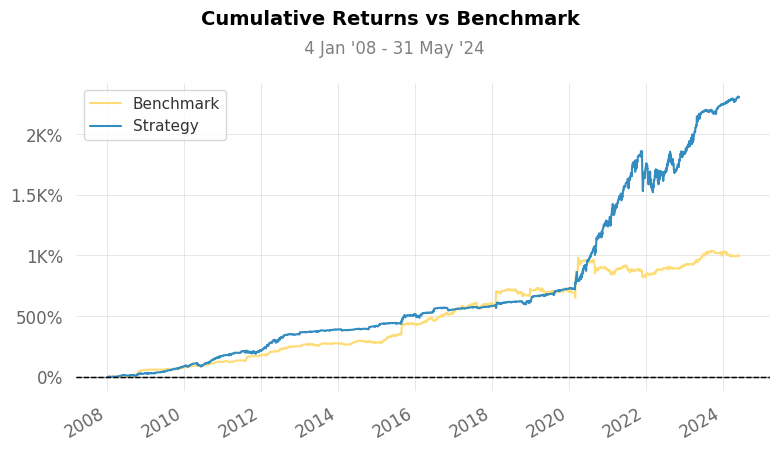

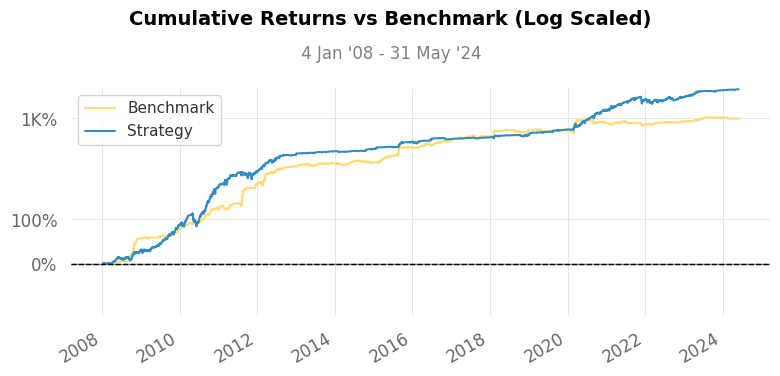

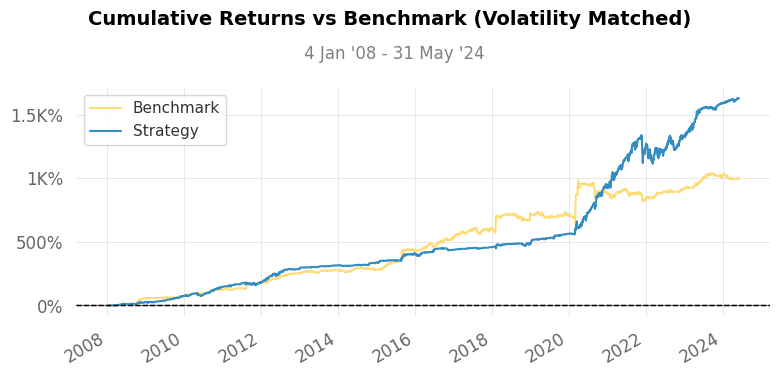

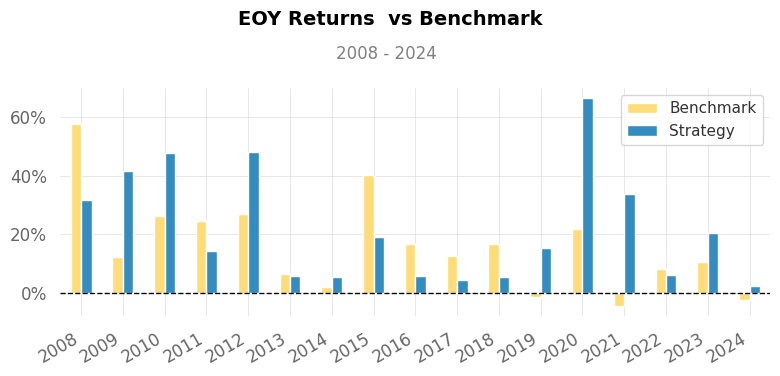

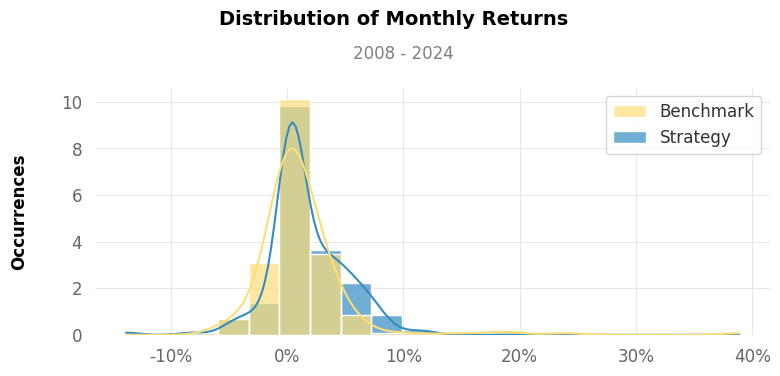

/usr/local/lib/python3.10/dist-packages/quantstats/_plotting/core.py:294: FutureWarning:

Passing additional kwargs to DatetimeIndexResampler.sum has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.



UnsupportedFunctionCall: numpy operations are not valid with resample. Use .resample(...).sum() instead

In [ ]:
#
!pip install quantstats
import quantstats as qs

qs.reports.full(df_strategy['combined_strategy'].fillna(0), df_prof['sample_ret'].fillna(0))

In [ ]:
import plotly.figure_factory as ff
import numpy as np

# Convert the dataframe columns to numpy arrays and remove inf and NaN values
optimal_portfolio_returns = np.nan_to_num(df_og['combined_strategy'].fillna(0).values)
sp500_returns = np.nan_to_num(df['SPY_Return'].fillna(0).values)
benchmark_returns = np.nan_to_num(df['SPY_Return'].fillna(0).values)

# Create a histogram of portfolio returns
fig = ff.create_distplot([optimal_portfolio_returns, sp500_returns],
                         ['combined_strategy', 'SPY'],
                         bin_size=.001,
                         show_rug=False)

# Add a title and axis labels
fig.update_layout(title='Distribution of Portfolio Returns',
                  xaxis_title='Returns',
                  yaxis_title='Frequency')

# Show the plot
fig.show()

In [ ]:
# prompt: plot the under water plot for the portfolio comparing with s&p500 using plotly

import plotly.graph_objects as go

# Calculate the underwater plot for the optimal portfolio
underwater_optimal = ((1+df_og['combined_strategy']).cumprod() / (1+df_og['combined_strategy']).cumprod().cummax() - 1) * 100

# Calculate the underwater plot for the S&P 500
underwater_sp500 = (df['SPY'].fillna(0) / df['SPY'].fillna(0).cummax() - 1) * 100

df_prof['sample_ret']
underwater_prof = ((1+df_prof['sample_ret'].fillna(0)).cumprod() / (1+df_prof['sample_ret'].fillna(0)).cumprod().cummax() - 1) * 100

# Create the Plotly figure
fig = go.Figure()

# Add the underwater plot for the optimal portfolio
fig.add_trace(go.Scatter(x=df_og['Date'], y=underwater_optimal,
                         mode='lines', name='Combined Portfolio', line=dict(color='blue')))

# Add the underwater plot for the S&P 500
fig.add_trace(go.Scatter(x=df_og['Date'], y=underwater_sp500,
                         mode='lines', name='S&P 500', line=dict(color='red')))


# Add the underwater plot for the Prof strategy
fig.add_trace(go.Scatter(x=df_og['Date'], y=underwater_prof,
                         mode='lines', name='Benchmark Strategy', line=dict(color='green')))


# Customize the layout
fig.update_layout(
    title='Underwater Plot: Combined Portfolio vs. S&P 500 vs. Benchmark Strategy',
    xaxis_title='Date',
    yaxis_title='Underwater (%)',
    legend_title='Portfolios',
)

# Show the plot
fig.show()


In [124]:
df_rs = df_og[['combined_strategy','Date']]
df_rs['Date'] = pd.to_datetime(df_rs['Date'])
df_rs.set_index('Date', inplace=True)
_ = plot_rolling_sharpe_ratio(df_rs['combined_strategy'].fillna(0), window = 504)